In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from datetime import datetime
import yfinance as yf
import datetime as dt

symbols = ['GOOGL', 'XOM', 'JNJ', 'AMZN', 'JPM', 'MSFT', 'VOD',  'ADBE', 'NVDA', 'CRM' ]
 
all_stocks = pd.DataFrame()

In [29]:
start = pd.Timestamp('2010-01')
end = pd.Timestamp('2020-12')
data_source = 'yahoo'

In [30]:
all_stocks = yf.download(symbols, start=start, end=end)['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [31]:
all_stocks.head()

,ADBE,AMZN,CRM,GOOGL,JNJ,JPM,MSFT,NVDA,VOD,XOM
Date,,,,,,,,,,
2010-01-04,37.090000,6.6950,18.705000,15.684434,43.318600,29.852802,23.522568,4.240800,10.326456,40.983101
2010-01-05,37.700001,6.7345,18.625000,15.615365,42.816296,30.431053,23.530170,4.302728,10.250754,41.143124
2010-01-06,37.619999,6.6125,18.592501,15.221722,43.164566,30.598249,23.385759,4.330249,10.170604,41.498726
2010-01-07,36.889999,6.5000,18.510000,14.867367,42.856472,31.204363,23.142555,4.245388,9.979123,41.368332
2010-01-08,36.689999,6.6760,18.537500,15.065566,43.003830,31.127731,23.302160,4.254563,9.827724,41.202393


In [32]:
returns = np.log(all_stocks/all_stocks.shift(1)).dropna(how="any")
returns.head()

,ADBE,AMZN,CRM,GOOGL,JNJ,JPM,MSFT,NVDA,VOD,XOM
Date,,,,,,,,,,
2010-01-05,0.016313,0.005883,-0.004286,-0.004413,-0.011663,0.019185,0.000323,0.014497,-0.007358,0.003897
2010-01-06,-0.002124,-0.018282,-0.001746,-0.025532,0.008101,0.005479,-0.006156,0.006376,-0.007850,0.008606
2010-01-07,-0.019595,-0.017160,-0.004447,-0.023555,-0.007163,0.019615,-0.010454,-0.019792,-0.019006,-0.003147
2010-01-08,-0.005436,0.026717,0.001485,0.013243,0.003433,-0.002459,0.006873,0.002159,-0.015288,-0.004019
2010-01-11,-0.013169,-0.024335,-0.006766,-0.001513,0.000156,-0.003363,-0.012802,-0.014115,0.014395,0.011157


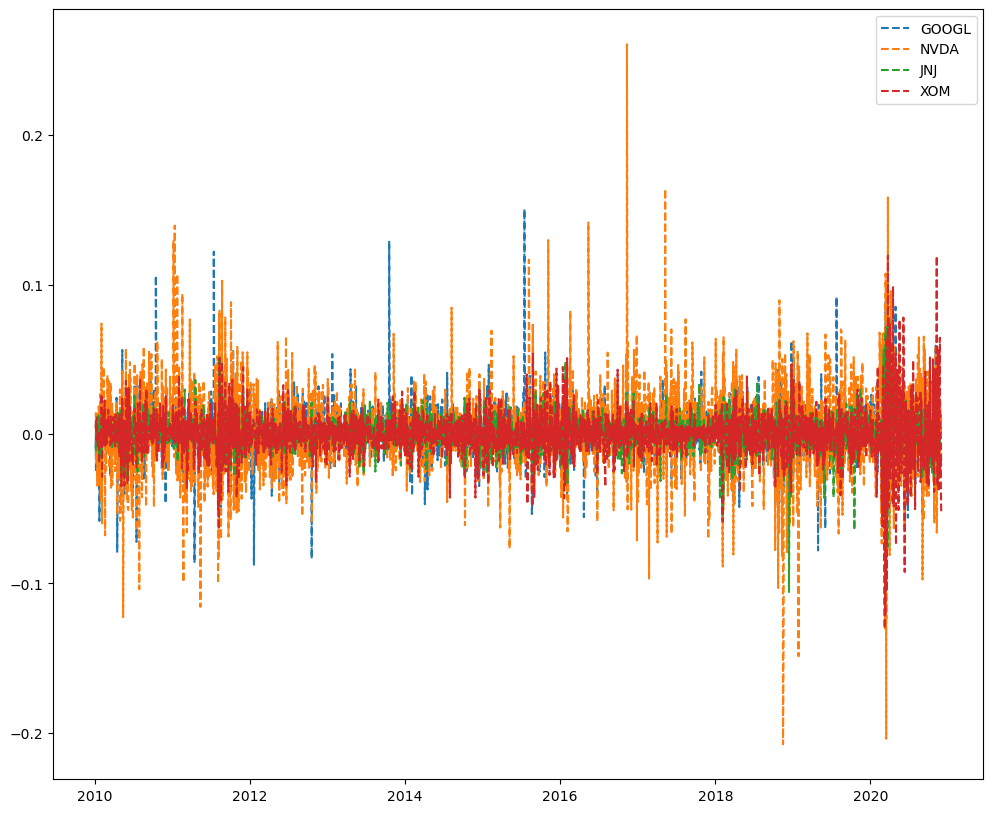

In [33]:
plt.figure(figsize=(12, 10))
plt.plot(returns.index, returns.GOOGL, label='GOOGL', linestyle='dashed')
plt.plot(returns.index, returns.NVDA, label='NVDA', linestyle='dashed')
plt.plot(returns.index, returns.JNJ, label='JNJ', linestyle='dashed')
plt.plot(returns.index, returns.XOM, label='XOM', linestyle='dashed')
plt.legend()
plt.show()

In [34]:
import numpy as np
from scipy.optimize import minimize

In [36]:
# mean daily returns of all stocks
returns.mean()

ADBE     0.000931
AMZN     0.001152
CRM      0.000938
GOOGL    0.000627
JNJ      0.000413
JPM      0.000469
MSFT     0.000795
NVDA     0.001257
VOD      0.000094
XOM     -0.000071
dtype: float64

In [37]:
np.cov(returns, rowvar=False)

array([[3.69414040e-04, 1.95328727e-04, 2.60225053e-04, 1.74162363e-04,
        8.58594250e-05, 1.56868158e-04, 1.95336639e-04, 2.61602226e-04,
        1.16391414e-04, 1.04988034e-04],
       [1.95328727e-04, 3.99014859e-04, 2.25146376e-04, 1.88500582e-04,
        6.96289330e-05, 1.18868971e-04, 1.69152639e-04, 2.25839746e-04,
        9.11461693e-05, 8.51540283e-05],
       [2.60225053e-04, 2.25146376e-04, 5.14987793e-04, 1.82770866e-04,
        8.09515814e-05, 1.70954120e-04, 1.93415767e-04, 2.89756364e-04,
        1.31428271e-04, 1.16108791e-04],
       [1.74162363e-04, 1.88500582e-04, 1.82770866e-04, 2.66419308e-04,
        7.38768445e-05, 1.37054759e-04, 1.60951053e-04, 2.10666719e-04,
        1.05860941e-04, 1.04788291e-04],
       [8.58594250e-05, 6.96289330e-05, 8.09515814e-05, 7.38768445e-05,
        1.14669101e-04, 9.34128896e-05, 8.24453812e-05, 9.22131027e-05,
        6.72853594e-05, 7.67354608e-05],
       [1.56868158e-04, 1.18868971e-04, 1.70954120e-04, 1.37054759e-04,
   

In [39]:
# the objective function is to minimize the portfolio risk
def objective(weights): 
    weights = np.array(weights)
    return weights.dot(returns.cov()).dot(weights.T)

In [40]:
# The constraints
cons = (# The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        # This constraint says that the inequalities (ineq) must be non-negative.
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        {"type": "ineq", "fun": lambda x: np.sum(returns.mean()*x)-0.001}) 

In [41]:
# Every stock can get any weight from -1 to 1
bounds = tuple((-1,1) for x in range(returns.shape[1])) 
bounds

((-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1),
 (-1, 1))

In [42]:
# Initialize the weights with an even split
# In out case each stock will have 10% at the beginning
guess = [0.01 for x in range(returns.shape[1])]
guess

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

In [43]:
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
optimized_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00025242754956852166
       x: [ 1.534e-01  1.970e-01  1.547e-01  9.338e-02  5.113e-02
            6.225e-02  1.266e-01  2.176e-01 -1.180e-02 -4.431e-02]
     nit: 2
     jac: [ 4.829e-04  4.754e-04  5.533e-04  3.793e-04  1.686e-04
            3.292e-04  3.971e-04  6.847e-04  2.290e-04  2.164e-04]
    nfev: 22
    njev: 2

In [44]:
optimized_results.x

array([ 0.15341869,  0.19699688,  0.15474153,  0.09338074,  0.051132  ,
        0.0622465 ,  0.12659923,  0.21759888, -0.01180091, -0.04431354])

In [45]:
# we get 1
np.sum(optimized_results.x)

0.9999999999999996

In [46]:
np.sum(returns.mean()*optimized_results.x)
#0.0012558726753445122
#0.000999999998762897

0.0010000000038098862

In [47]:
pd.DataFrame(list(zip(symbols, optimized_results.x)), columns=['Symbol', 'Weight'])

,Symbol,Weight
0,GOOGL,0.153419
1,XOM,0.196997
2,JNJ,0.154742
3,AMZN,0.093381
4,JPM,0.051132
5,MSFT,0.062247
6,VOD,0.126599
7,ADBE,0.217599
8,NVDA,-0.011801
9,CRM,-0.044314


In [51]:
df_sp500 = pd.read_csv('./all_stocks_5yr.csv')

In [52]:
df_sp500.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [54]:
#for dtype in df_sp500.dtypes.iteritems():
#    print(dtype)

In [55]:
df_sp500['date'] = pd.to_datetime(df_sp500['date'])
df_sp500.set_index('date')

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...
2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS


In [56]:
start = pd.Timestamp('2010-01-01')
end = pd.Timestamp('2020-12-31')

In [57]:
def get_symbols(symbols,data_in,ohlc,begin_date=None,end_date=None):
    out = []
    new_symbols = []
    
    start = pd.Timestamp(begin_date)
    end = pd.Timestamp(end_date)
    
    for symbol in symbols:
        data_in.loc[data_in['Name'] == symbol]
        mask = (data_in['date'] > start) & (data_in['date'] <= end)
        data_in = data_in.loc[mask]
        new_symbols.append(symbol) 
        out.append(data_in[ohlc].astype('float'))
        data = pd.concat(out, axis = 1)
        data.columns = new_symbols
        
    return data

In [58]:
prices = get_symbols(symbols,data_in=df_sp500,ohlc='close', begin_date='2010-01-01', end_date='2020-12-31')

In [59]:
prices.head()

,GOOGL,XOM,JNJ,AMZN,JPM,MSFT,VOD,ADBE,NVDA,CRM
0,14.75,14.75,14.75,14.75,14.75,14.75,14.75,14.75,14.75,14.75
1,14.46,14.46,14.46,14.46,14.46,14.46,14.46,14.46,14.46,14.46
2,14.27,14.27,14.27,14.27,14.27,14.27,14.27,14.27,14.27,14.27
3,14.66,14.66,14.66,14.66,14.66,14.66,14.66,14.66,14.66,14.66
4,13.99,13.99,13.99,13.99,13.99,13.99,13.99,13.99,13.99,13.99
